In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spqd
%matplotlib inline

**Problem 1**: We can generalize the Fibonacci sequence so that we have the recurrence relationship

$$
p_{n} = p_{n-1} + ap_{n-2}, ~ a \in \mathbb{R}, ~ n\geq 2,
$$

where we start the sequence $p_{n}$ with the initial conditions

$$
p_{0} = s_{0}, ~ p_{1} = s_{1}, ~ s_{j} \in \mathbb{R}.
$$

1a) (3pts) Using the guess $p_{n} = \lambda^{n}$, show that you get two solutions for $\lambda$, say $\lambda_{\pm}$, where

$$
\lambda_{\pm} = \frac{1}{2}\left(1\pm\sqrt{1+4a} \right)
$$

1b) (3pts) Writing the general solution as 

$$
p_{n} = c_{+}\lambda_{+}^{n} + c_{-}\lambda_{-}^{n}
$$

show that when we take our initial conditions into account, we find that the constants $c_{+}$ and $c_{-}$ are given by 

$$
c_{+} = \frac{s_{1}-s_{0}\lambda_{-}}{\lambda_{+}-\lambda_{-}}, ~ c_{-} = \frac{s_{0}\lambda_{+}-s_{1}}{\lambda_{+}-\lambda_{-}}
$$

1c) (4pts) Let $a\geq -\frac{1}{4}$.  

- Find the range of $a$ such that 

$$ 
|\lambda_{+}|\leq 1, ~|\lambda_{-}| < 1
$$
    
- Find the range of $a$ such that 

$$ 
|\lambda_{+}|> 1, ~|\lambda_{-}| \leq 1
$$

- Find the range of $a$ such that 

$$ 
|\lambda_{+}|>1, ~|\lambda_{-}| > 1
$$

_Answers to Problem 1_

#### 1a)

Letting $p_{n} = \lambda^{n}$ we find that 
\begin{align*}
\lambda^{n} = & \lambda^{n-1} + a\lambda^{n-2}\\
 = & \lambda^{n}\left(\lambda^{-1} + a\lambda^{-2}\right)
\end{align*}
so that
$$
1 = \frac{1}{\lambda} + \frac{a}{\lambda^{2}}
$$
and thus 
$$
\lambda^{2} - \lambda - a = 0.
$$
Solving for $\lambda$, we find that
$$
\lambda_{\pm} = \frac{1}{2}\left(1 \pm \sqrt{1+4a}\right)
$$


#### 1b)

We have that 
$$
c_{+} + c_{-} = s_{0}, ~ c_{+}\lambda_{+} + c_{-}\lambda_{-} = s_{1}.
$$
Solving for $c_{-}=s_{0}-c_{+}$, we see that 
$$
c_{+}\left(\lambda_{+}-\lambda_{-}\right) = s_{1} - s_{0}\lambda_{-}
$$
so that
$$
c_{+}= \frac{s_{1} - s_{0}\lambda_{-}}{\lambda_{+}-\lambda_{-}}
$$
Using $c_{-} = s_{0}-c_{+}$, we have 
$$
c_{-} = s_{0} - \frac{s_{1} - s_{0}\lambda_{-}}{\lambda_{+}-\lambda_{-}} = \frac{s_{0}\lambda_{+} - s_{1}}{\lambda_{+}-\lambda_{-}}
$$

#### 1c)

We see that $\lambda_{+}>0$ for all $a\geq -1/4$, so we only need to check $\lambda_{+}<1$, which becomes
$$
\sqrt{1+4a}< 1
$$
so that squaring both sides, we see this becomes $a<0$.  

For $\lambda_{-}$, we start with $|\lambda_{-}|<1$ which is 
$$
-1 < \sqrt{1+4a} < 3,
$$
so that this, using that the radical is treated as a positive quantity, becomes after squaring all relevant sides
$$
0 < 1 + 4a < 9
$$ 
or 
$$
-1/4 < a < 2.
$$
Therefore, we see that for the range of $a$ which ensures $|\lambda_{+}|,|\lambda_{-}|\leq 1$ is given by
$$
-\frac{1}{4}\leq a \leq 0.
$$
The range of $a$ which ensures that $|\lambda_{+}|>1$, $|\lambda_{-}|\leq 1$ is given by
$$
0 < a \leq 2,
$$
and the range of $a$ which ensures that $|\lambda_{+}|>1$, $|\lambda_{-}|> 1$ is given by 
$$
a > 2.
$$

**Problem 2**: Now let us numerically explore the results from Problem 2.  

2a) (3pts) Using the skeleton-code below write a function `fib_general` which generates, for given integer value $n\geq 2$ and real values `a`, `s0`, and `s1`, the $n+1$ array of points `pn` such that 

`
pn[0] = s0, pn[1] = s1
`

and the entries in `pn` are given by the recurrence relationship from Problem 2.  

2b) (3pts) Fixing $n=10$, $s_{0}=1$, $s_{1}=1$, using your results from Problem 2c, choose three values of $a$, one each from the three different ranges of values of $a$, and generate a plot of $p_{n}$ for each.  Make sure axes are appropriately labeled.  Explain how the plot confirms the results you found in Problem 2c.  

2c) (2pts) Fixing $n=10$, $s_{0}=1$, $s_{1}=1$, choose $a=-1/2$ and generate a plot of $p_{n}$.  Briefly explain the results you see and how they differ from those in Problem 3b).  

_Answers to Problem 2_

In [6]:
#2a)
def fib_general(n,a,s0,s1):
    pn = np.zeros(int(n)+1)
    pn[0] = s0
    pn[1] = s1
    for jj in range(2,int(n)+1):
        pn[jj] = pn[jj-1] + a*pn[jj-2]
    return pn

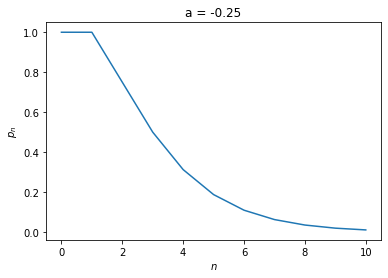

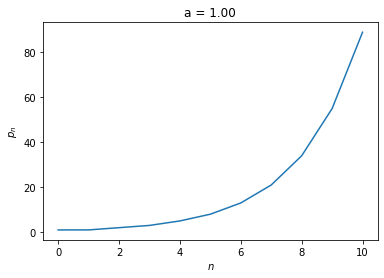

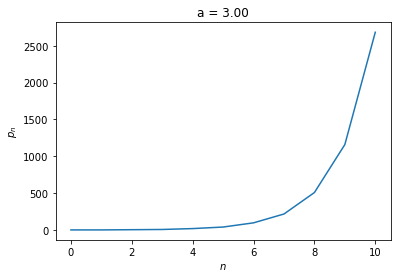

In [7]:
#2b)
avals = np.array([-1./4., 1., 3.])
nvals = np.array(range(0,10+1))

for jj in range(0,avals.size):
    plt.figure(jj)
    plt.plot(nvals,fib_general(10,avals[jj],1.,1.))
    plt.xlabel('$n$')
    plt.ylabel('$p_{n}$')
    plt.title('a = %1.2f' % avals[jj])

As we see, for $a=-1/4$, we have both $\lambda_{+}$ and $\lambda_{-}$ being less than one in magnitude, and thus the overall profile must decay as $n$ increases.  For $a=1$, we must have growth, but as would be expected, the growth is weaker than in the $a=3$ case since for $a=3$, both parts of the analytic solution are growin in magnitude as $n$ increases.  

Text(0.5, 1.0, 'a = -0.50')

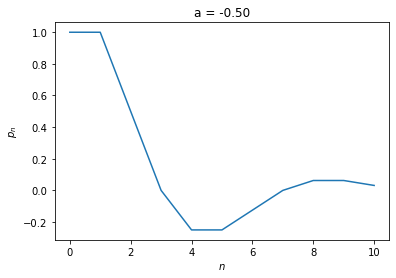

In [8]:
#2c)
plt.plot(nvals,fib_general(10,-.5,1.,1.))
plt.xlabel('$n$')
plt.ylabel('$p_{n}$')
plt.title('a = %1.2f' % -.5)

As we see, $a=-1/2$ leads to markedly different dynamics as $n$ increases.  While we see an overall decay, we also see oscillation, which was not see above.  

**Problem 3**: Let the Fresnel function $f(x)$ be defined via the integral

$$
f(x) = \int_{0}^{x} \cos(t^{2}) dt.
$$

4a) (2pts) Write the code that creates a sequence of $n+1$ points $x_{j}$ such that $0 \leq x_{j} \leq x$, with  

$$
x_{j} = j\delta x, ~ \delta x = \frac{x}{n}, ~ j=0,\cdots,n
$$

4b) (2pts) Find the second order Taylor polynomial approximation around $x_{j}$ of $\cos(t^{2})$, i.e. find  $T_{2}(t;x_{j})$.  

4c) (2pts) Using the fact that $\delta x = x_{j+1}-x_{j}$, show that 

$$
\int_{x_{j}}^{x_{j+1}} T_{2}(t;x_{j})dt = \delta x \cos\left(x_{j}^{2}\right)- \delta x^{2} \left(x_{j}\sin\left(x_{j}^{2}\right)\right) - \frac{\delta x^{3}}{3}\left(2x_{j}^{2}\cos\left(x_{j}^{2}\right) + \sin\left(x_{j}^{2}\right)\right)
$$

Note, the $u$-substitution $u=t-x_{j}$ will make your life so much easier here.  

4d) (4pts) Using basic properties of integrals and Taylor series, show that 
\begin{align*}
f(x_{j+1}) = & f(x_{j}) + \int_{x_{j}}^{x_{j+1}}\cos(t^{2})dt \\
\approx & f(x_{j}) + \int_{x_{j}}^{x_{j+1}}T_{2}(t;x_{j})dt\\
\approx & f(x_{j}) + \left(\delta x \cos\left(x_{j}^{2}\right)- \delta x^{2} \left(x_{j}\sin\left(x_{j}^{2}\right)\right) - \frac{\delta x^{3}}{3}\left(2x_{j}^{2}\cos\left(x_{j}^{2}\right) + \sin\left(x_{j}^{2}\right)\right) \right)
\end{align*}

Using the code-skeleton below, write a Python function called `fresnel_integrator` which takes an array `xvals` and returns a corresponding array, `fvals`, which contains the values of the Fresnel function $f(x)$.  Plot $f(x)$ for $0\leq x \leq 10$ with $\delta x = 10^{-2}$.  Briefly describe what you see.  

4e) (4pts) Fixing $x=10$, compare your approximate integrator to the "true" value of $f(10)$ for $\delta x =1,10^{-1},10^{-2},10^{-3}, 10^{-4}$ and generate a log-log plot of the error versus the corresponding value of $n$.  Label axes for your graph.  Describe your graph and comment on any trends you observe.

Use the code 

`
fvalf = spqd.quad(lambda t: np.cos(t**2.),0.,10.)
fvalt = fvalf[0]
`

to generate the "true" value `fvalt`.  Likewise note, if we want the last entry of an array, say `fvals`, we just call

`
fvals[-1]
`

See the code-skeleton below.  

_Answers to Problem 4_

In [10]:
#4a)
#xvals = np.linspace(0.,x,int(n)+1)

#### 3b)

Using the definition of a Taylor series, we have that 

$$
T_{2}(t;x_{j}) = \cos\left(x_{j}^{2}\right) - 2x_{j}\sin\left(x_{j}^{2}\right)\left(t-x_{j}\right) - \left(\sin\left(x_{j}^{2}\right) + 2x^{2}_{j}\cos\left(x_{j}^{2}\right)\right)\left(t-x_{j}\right)^{2}
$$

#### 3c)

Using the u-sub, we have

\begin{align*}
\int_{x_{j}}^{x_{j+1}} T_{2}(t;x_{j}) dt = & \int_{0}^{\delta x} \left(\cos\left(x_{j}^{2}\right) - 2x_{j}\sin\left(x_{j}^{2}\right)u - \left(\sin\left(x_{j}^{2}\right) + 2x^{2}_{j}\cos\left(x_{j}^{2}\right)\right)u^{2}\right) du \\
= & \delta x \cos\left(x_{j}^{2}\right)- \delta x^{2} \left(x_{j}\sin\left(x_{j}^{2}\right)\right) - \frac{\delta x^{3}}{3}\left(\sin\left(x_{j}^{2}\right)+2x_{j}^{2}\cos\left(x_{j}^{2}\right)\right)
\end{align*}

#### 3d)
Using properties of integration, we have that

\begin{align*}
f(x_{j+1}) = & \int_{0}^{x_{j+1}} \cos(t^{2})dt\\
= & \int_{0}^{x_{j}}\cos(t^{2}) dt + \int_{x_{j}}^{x_{j+1}} \cos(t^{2})dt\\
= & f(x_{j}) + \int_{x_{j}}^{x_{j+1}} \cos(t^{2})dt
\end{align*}

Then we just substitute the formula from above.  The code we need to use to find the integral is presented below.  

Text(0.5, 0, '$f(x)$')

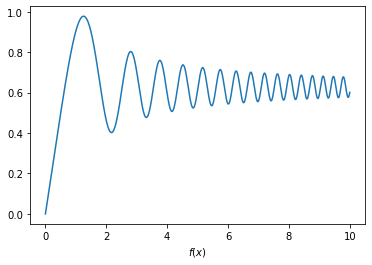

In [12]:
# 4d)
# You add in the missing code
def fresnel_integrator(xvals):
    dx = xvals[1]-xvals[0]
    n = xvals.size-1
    fvals = np.zeros(int(n)+1)
    for jj in range(0,int(n)):
        xj = xvals[jj]
        x2 = xj**2.
        cx = np.cos(x2)
        sx = np.sin(x2)
        fupdate = dx*cx -dx**2.*xj*sx - dx**3.*(2.*xj**2.*cx+sx)/3.
        fvals[jj+1] = fvals[jj] + fupdate
    return fvals

xvals = np.linspace(0.,10.,int(1e3)+1)
fvals = fresnel_integrator(xvals)
plt.plot(xvals,fvals)
plt.xlabel('$x$')
plt.xlabel('$f(x)$')

We see that the Fresnel function $f(x)$ is oscillatory in nature, with a tendency towards oscillating around a mean near $.7$.  

Text(0, 0.5, '$\\log_{10}|Error|$')

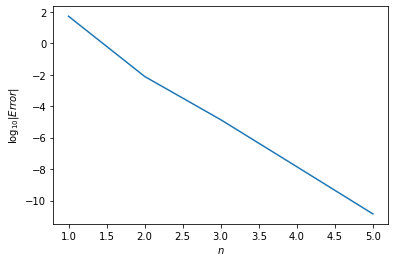

In [13]:
# 4e)
# You add in the missing code
fvalf = spqd.quad(lambda t: np.cos(t**2.),0.,10.)
fvalt = fvalf[0]

nvals = np.array([1e1,1e2,1e3,1e4,1e5])
evals = np.zeros(nvals.size)

for ll in range(0,nvals.size):
    xvals = np.linspace(0.,10.,int(nvals[ll])+1)
    fvals = fresnel_integrator(xvals)
    evals[ll] = np.log10(np.abs(fvals[-1]-fvalt))

plt.plot(np.log10(nvals),evals)
plt.xlabel('$n$')
plt.ylabel('$\log_{10}|Error|$')

As seen, by the time $N=10^{5}$, the accuracy of our method is on the order of $10^{-10}$, or we have about 10 digits of accuracy.  